In [1]:
in_file = "osaka.data.csv"
out_file = "kion10y.csv"

# CSVファイルを一行ずつ読み込み ---(*1)
with open(in_file, "rt", encoding="Shift_JIS") as fr:
    lines = fr.readlines()

# ヘッダをそぎ落として、新たなヘッダをつける ---(*2)
lines = ["年,月,日,気温,品質,均質\n"] + lines[5:]
lines = map(lambda v: v.replace('/', ','), lines)
result = "".join(lines).strip()
print(result)

# 結果をファイルへ出力 ---(*3)
with open(out_file, "wt", encoding="utf-8") as fw:
    fw.write(result)
    print("saved.")


年,月,日,気温,品質,均質
2009,5,19,20.0,8,1
2009,5,20,23.0,8,1
2009,5,21,22.6,8,1
2009,5,22,20.8,8,1
2009,5,23,22.0,8,1
2009,5,24,20.1,8,1
2009,5,25,18.5,8,1
2009,5,26,20.2,8,1
2009,5,27,21.8,8,1
2009,5,28,19.2,8,1
2009,5,29,22.0,8,1
2009,5,30,22.6,8,1
2009,5,31,19.6,8,1
2009,6,1,21.1,8,1
2009,6,2,22.9,8,1
2009,6,3,22.2,8,1
2009,6,4,21.5,8,1
2009,6,5,19.4,8,1
2009,6,6,22.4,8,1
2009,6,7,21.3,8,1
2009,6,8,22.2,8,1
2009,6,9,21.8,8,1
2009,6,10,21.0,8,1
2009,6,11,22.2,8,1
2009,6,12,23.4,8,1
2009,6,13,24.4,8,1
2009,6,14,24.4,8,1
2009,6,15,23.7,8,1
2009,6,16,23.6,8,1
2009,6,17,24.9,8,1
2009,6,18,25.4,8,1
2009,6,19,25.4,8,1
2009,6,20,26.0,8,1
2009,6,21,25.3,8,1
2009,6,22,27.0,8,1
2009,6,23,26.1,8,1
2009,6,24,25.1,8,1
2009,6,25,26.5,8,1
2009,6,26,26.0,8,1
2009,6,27,25.9,8,1
2009,6,28,26.7,8,1
2009,6,29,25.7,8,1
2009,6,30,25.0,8,1
2009,7,1,26.4,8,1
2009,7,2,23.9,8,1
2009,7,3,23.3,8,1
2009,7,4,24.3,8,1
2009,7,5,26.0,8,1
2009,7,6,26.7,8,1
2009,7,7,27.4,8,1
2009,7,8,27.5,8,1
2009,7,9,28.8,8,1
2009,7,10,27.2,

In [2]:
import pandas as pd

# PandasでCSVを読み込む ---(*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")

# 日付ごとに気温をリストにまとめる ---(*2)
md = {}
for i, row in df.iterrows():
    m,  d, v = (int(row['月']), int(row['日']), float(row['気温']))
    key = str(m) + "/" + str(d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 日付ごとに平均を求める ---(*3)
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key]) # ---(*4)
    print("{0} : {1}".format(key, v))



5/19 : 20.48
5/20 : 21.370000000000005
5/21 : 21.78
5/22 : 21.779999999999998
5/23 : 20.72
5/24 : 21.360000000000003
5/25 : 21.65
5/26 : 21.67
5/27 : 21.38
5/28 : 21.050000000000004
5/29 : 21.770000000000003
5/30 : 21.630000000000003
5/31 : 22.02
6/1 : 22.05
6/2 : 21.99
6/3 : 22.12
6/4 : 22.39
6/5 : 21.12
6/6 : 21.96
6/7 : 22.07
6/8 : 22.47
6/9 : 22.909999999999997
6/10 : 23.289999999999996
6/11 : 23.139999999999997
6/12 : 22.910000000000004
6/13 : 22.949999999999996
6/14 : 23.76
6/15 : 23.55
6/16 : 23.259999999999998
6/17 : 24.22
6/18 : 24.009999999999998
6/19 : 23.749999999999996
6/20 : 23.81
6/21 : 23.24
6/22 : 24.220000000000006
6/23 : 24.45
6/24 : 24.79
6/25 : 25.23
6/26 : 24.839999999999996
6/27 : 25.58
6/28 : 25.16
6/29 : 25.640000000000004
6/30 : 25.810000000000002
7/1 : 26.350000000000005
7/2 : 26.71
7/3 : 25.909999999999997
7/4 : 26.309999999999995
7/5 : 26.170000000000005
7/6 : 26.23
7/7 : 25.93
7/8 : 27.199999999999996
7/9 : 27.240000000000002
7/10 : 27.840000000000003
7/11

In [3]:
avs["5/20"]

21.370000000000005

月
1      5.800000
2      6.526241
3      9.969032
4     15.125000
5     20.189032
6     23.556333
7     28.036129
8     29.164194
9     24.887333
10    19.566452
11    13.720333
12     8.288710
Name: 気温, dtype: float64


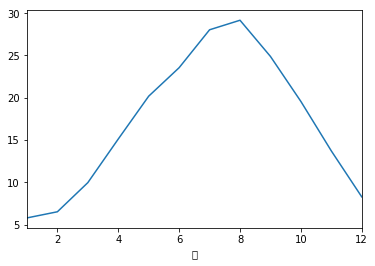

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
# CSVを読み込む ---(*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")
# 月ごとに平均を求める ---(*2)
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()
# 結果を出力 ---(*3)
print(gg)
gg.plot()
plt.savefig("tenki-heikin-tuki.png")
plt.show()

年
2009     1
2010    38
2011    13
2012     9
2013    21
2014     7
2015    13
2016    14
2017    16
2018    30
Name: 年, dtype: int64


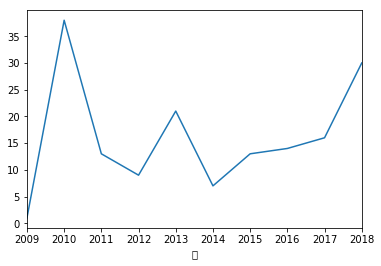

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
# ファイルを読む
df = pd.read_csv('kion10y.csv', encoding="utf-8")
# 気温が30度超えのデータを調べる ---(*1)
atui_bool = (df["気温"] > 30)
# データを抜き出す ---(*2)
atui = df[atui_bool]
# 年ごとにカウント ---(*3)
cnt = atui.groupby(["年"])["年"].count()
# 出力
print(cnt)
cnt.plot()
plt.savefig("tenki-over30.png")
plt.show()

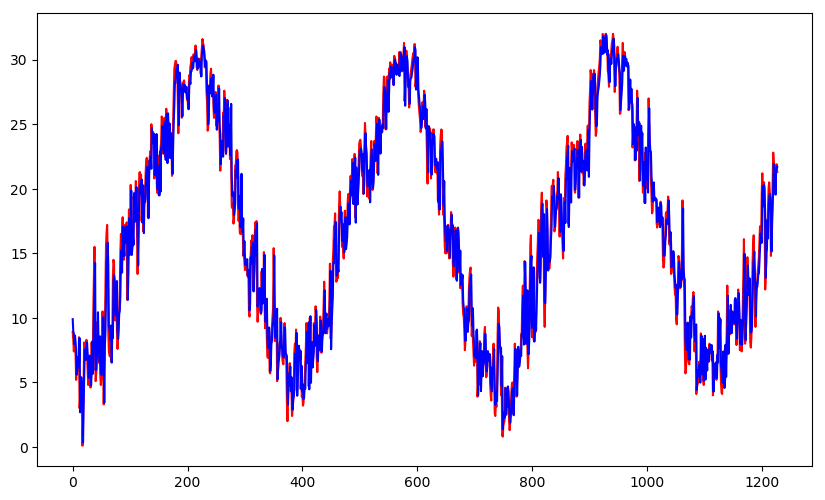

In [6]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 気温データ10年分の読み込み
df = pd.read_csv('kion10y.csv', encoding="utf-8")

# データを学習用とテスト用に分割する ---(*1)
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 6

# 過去6日分を学習するデータを作成 ---(*2)
def make_data(data):
    x = [] # 学習データ
    y = [] # 結果
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 直線回帰分析を行う ---(*3)
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット ---(*4)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()



In [7]:
pre_y - test_y

array([ 1.00030007,  0.65950806,  1.38411704, ..., -0.34034963,
       -0.16843721,  0.39712068])

In [8]:
diff_y = abs(pre_y - test_y)
print("average=", sum(diff_y) / len(diff_y))
print("max=", max(diff_y))

average= 1.31798509381
max= 7.15323873136
